In [874]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [875]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [876]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [877]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [878]:
df.country_long

0      India
1      India
2      India
3      India
4      India
       ...  
902    India
903    India
904    India
905    India
906    India
Name: country_long, Length: 907, dtype: object

India    907
Name: country_long, dtype: int64


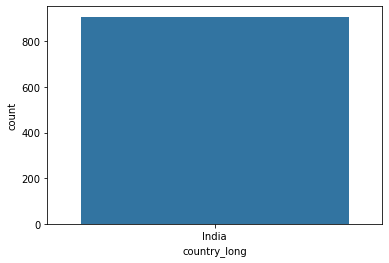

In [879]:
import seaborn as sns #checking for null
country_long=sns.countplot(x="country_long", data=df)
print(df["country_long"].value_counts())

In [880]:
#We can remove the column country & country_long as all 907 values are India . We shall also be removing gppd_idnr as it does
#not impact fuel type or capacity
#We also remove other_fuel2 & other_fuel3 as all values are null
#Source, url, and geo location sprce can also be elminated as they are not required features for predicting fuel type or cpacoty

In [881]:
# dropping these  columns as they are not relevant to predict primary fuel or capacity
df = df.drop(['country','country_long', 'gppd_idnr', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url', 'wepp_id', 'geolocation_source'], axis=1)

In [882]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [883]:
df.columns


Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


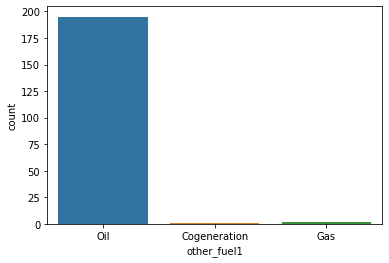

In [884]:
import seaborn as sns #checking for null
other_fuel1=sns.countplot(x="other_fuel1", data=df)
print(df["other_fuel1"].value_counts())

In [885]:
df=df.fillna({"other_fuel1":df["other_fuel1"].mode()[0]})

In [886]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [887]:
df.generation_gwh_2013 #checking for null

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: generation_gwh_2013, Length: 907, dtype: float64

In [888]:
df.generation_gwh_2019 #checking for null

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: generation_gwh_2019, Length: 907, dtype: float64

2019.0    519
Name: year_of_capacity_data, dtype: int64


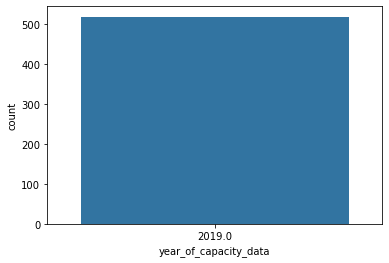

In [889]:
import seaborn as sns #checking for null
commissioning_year=sns.countplot(x="year_of_capacity_data", data=df)
print(df["year_of_capacity_data"].value_counts())

In [890]:
df.estimated_generation_gwh

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: estimated_generation_gwh, Length: 907, dtype: float64

In [891]:
#droppin estimated_generation_gwh, generation_gwh_2019, generation_gwh_2013. generation_data_source as null
df = df.drop(['estimated_generation_gwh','generation_gwh_2019', 'generation_gwh_2013', 'generation_data_source'], axis=1)

In [892]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


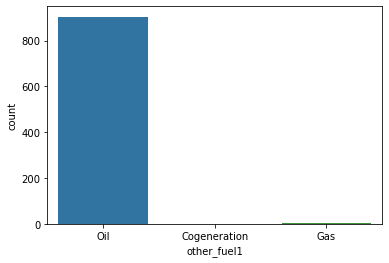

In [893]:
import seaborn as sns #checking for null
Otherfuel1=sns.countplot(x="other_fuel1", data=df1)
print(df["other_fuel1"].value_counts())

In [894]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


2019.0    519
Name: year_of_capacity_data, dtype: int64


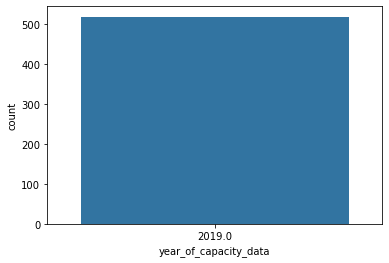

In [895]:
import seaborn as sns #checking for null
year_of_capacity_data=sns.countplot(x="year_of_capacity_data", data=df1)
print(df["year_of_capacity_data"].value_counts())

In [896]:
# dropping these  columns as they are null - generation_gwh_2019  and generation_gwh_2013
df = df.drop(['year_of_capacity_data'], axis=1)

In [897]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN


In [898]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [899]:
#adding zero to numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             861 non-null    float64
 3   longitude            861 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64


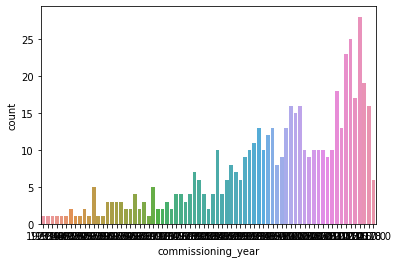

In [900]:
import seaborn as sns #checking for null
commissioning_year=sns.countplot(x="commissioning_year", data=df)
print(df["commissioning_year"].value_counts())
#AS U CAN SEE there is '?' in the data. We have to remove this

In [901]:
#Before using Iterative Imputer, we need to enable it using below code
from sklearn.experimental import enable_iterative_imputer
#import Iterative Imputer
from sklearn.impute import IterativeImputer

In [909]:
#using interative imputer for generation_gwh_2014	generation_gwh_2015	generation_gwh_2016	generation_gwh_2017	generation_gwh_201
iter_impute=IterativeImputer()
df1 = pd.DataFrame(iter_impute.fit_transform(df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]), columns=['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'])
df1

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
1,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
2,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
3,617.789264,843.747000,886.004428,663.774500,626.239128
4,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...
902,138.534752,0.994875,233.596650,865.400000,686.500000
903,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
904,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
905,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109


In [914]:
df['generation_gwh_2014']= df1['generation_gwh_2014']
df['generation_gwh_2015']= df1['generation_gwh_2015']
df['generation_gwh_2016']= df1['generation_gwh_2016']
df['generation_gwh_2017']= df1['generation_gwh_2017']
df['generation_gwh_2018']= df1['generation_gwh_2018']

In [915]:
#using interative imputer for 'latitude', 'longitude'
iter_impute=IterativeImputer()
ite_imp2 = pd.DataFrame(iter_impute.fit_transform(df[['latitude', 'longitude']]), columns=['latitude', 'longitude'])
ite_imp2

,latitude,longitude
0,28.1839,73.2407
1,24.7663,74.6090
2,21.9038,69.3732
3,23.8712,91.3602
4,21.9603,82.4091
...,...,...
902,16.2949,77.3568
903,12.8932,78.1654
904,15.2758,75.5811
905,24.3500,73.7477


In [916]:
df['latitude']= ite_imp2['latitude']
df['longitude']= ite_imp2['longitude']


In [924]:

df=df.fillna({"commissioning_year":df["commissioning_year"].mode()[0]})

In [925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   907 non-null    float64
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


2015.0    408
2013.0     25
2012.0     23
2016.0     19
2010.0     18
         ... 
1946.0      1
1956.0      1
1937.0      1
1949.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64


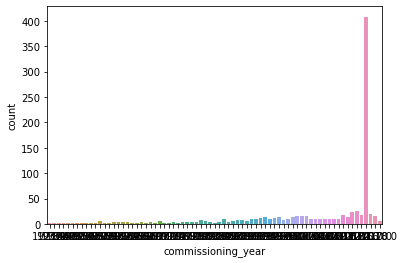

In [926]:
import seaborn as sns #checking for null
commissioning_year=sns.countplot(x="commissioning_year", data=df)
print(df["commissioning_year"].value_counts())
#AS U CAN SEE there is '?' in the data. We have to remove this

In [927]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   907 non-null    float64
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [928]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
std,590.085456,6.079148,4.812291,15.734928,2712.138317,2889.291071,2891.161416,2931.621922,3031.851922
min,0.000000,8.168900,68.644700,1927.000000,-560.922335,-369.611122,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,636.279670,664.038125,703.619225,804.900275,810.733240
50%,59.200000,21.281800,76.979200,2014.000000,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
75%,385.250000,25.176450,79.206100,2015.000000,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


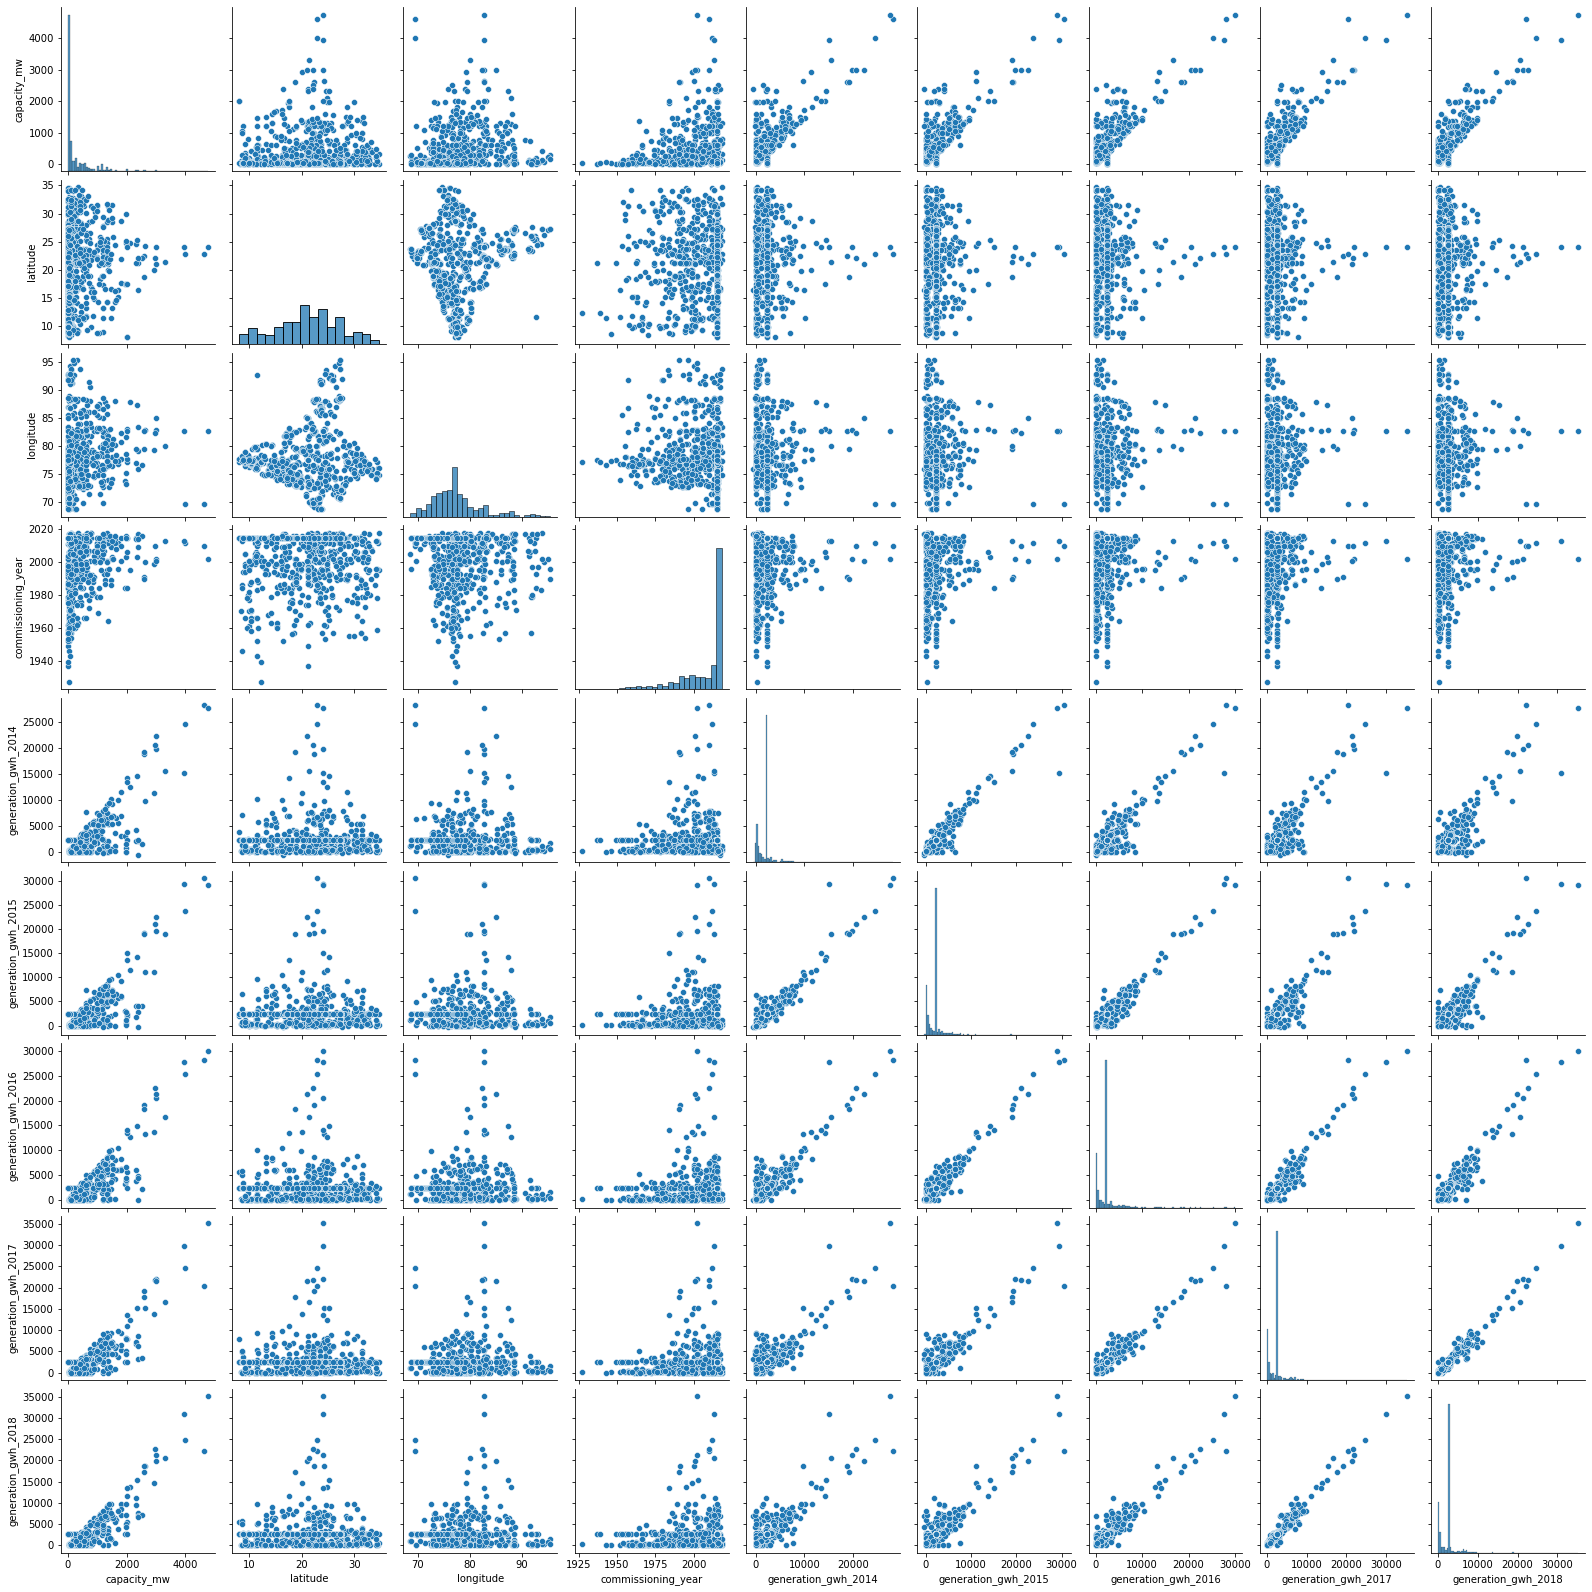

In [929]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot2.png')
plt.show()

In [930]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [931]:
#separating categorical data
df_visualization_Categorical_Data=df[["name", "primary_fuel", "other_fuel1"]].copy()

In [932]:
df_visualization_Categorical_Data.tail()

,name,primary_fuel,other_fuel1
902,YERMARUS TPP,Coal,Oil
903,Yelesandra Solar Power Plant,Solar,Oil
904,Yelisirur wind power project,Wind,Oil
905,ZAWAR MINES,Coal,Oil
906,iEnergy Theni Wind Farm,Wind,Oil


In [933]:
#separating continous data data
df_visualization_Continous_Data=df[["capacity_mw", "latitude", "longitude", "commissioning_year", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018"]].copy()

In [934]:
df_visualization_Continous_Data

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
1,98.0,24.7663,74.6090,2015.0,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
2,39.2,21.9038,69.3732,2015.0,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
3,135.0,23.8712,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,138.534752,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,2015.0,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
904,25.5,15.2758,75.5811,2015.0,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109
905,80.0,24.3500,73.7477,2015.0,2212.958480,2313.838020,2395.467100,2498.380142,2595.465109


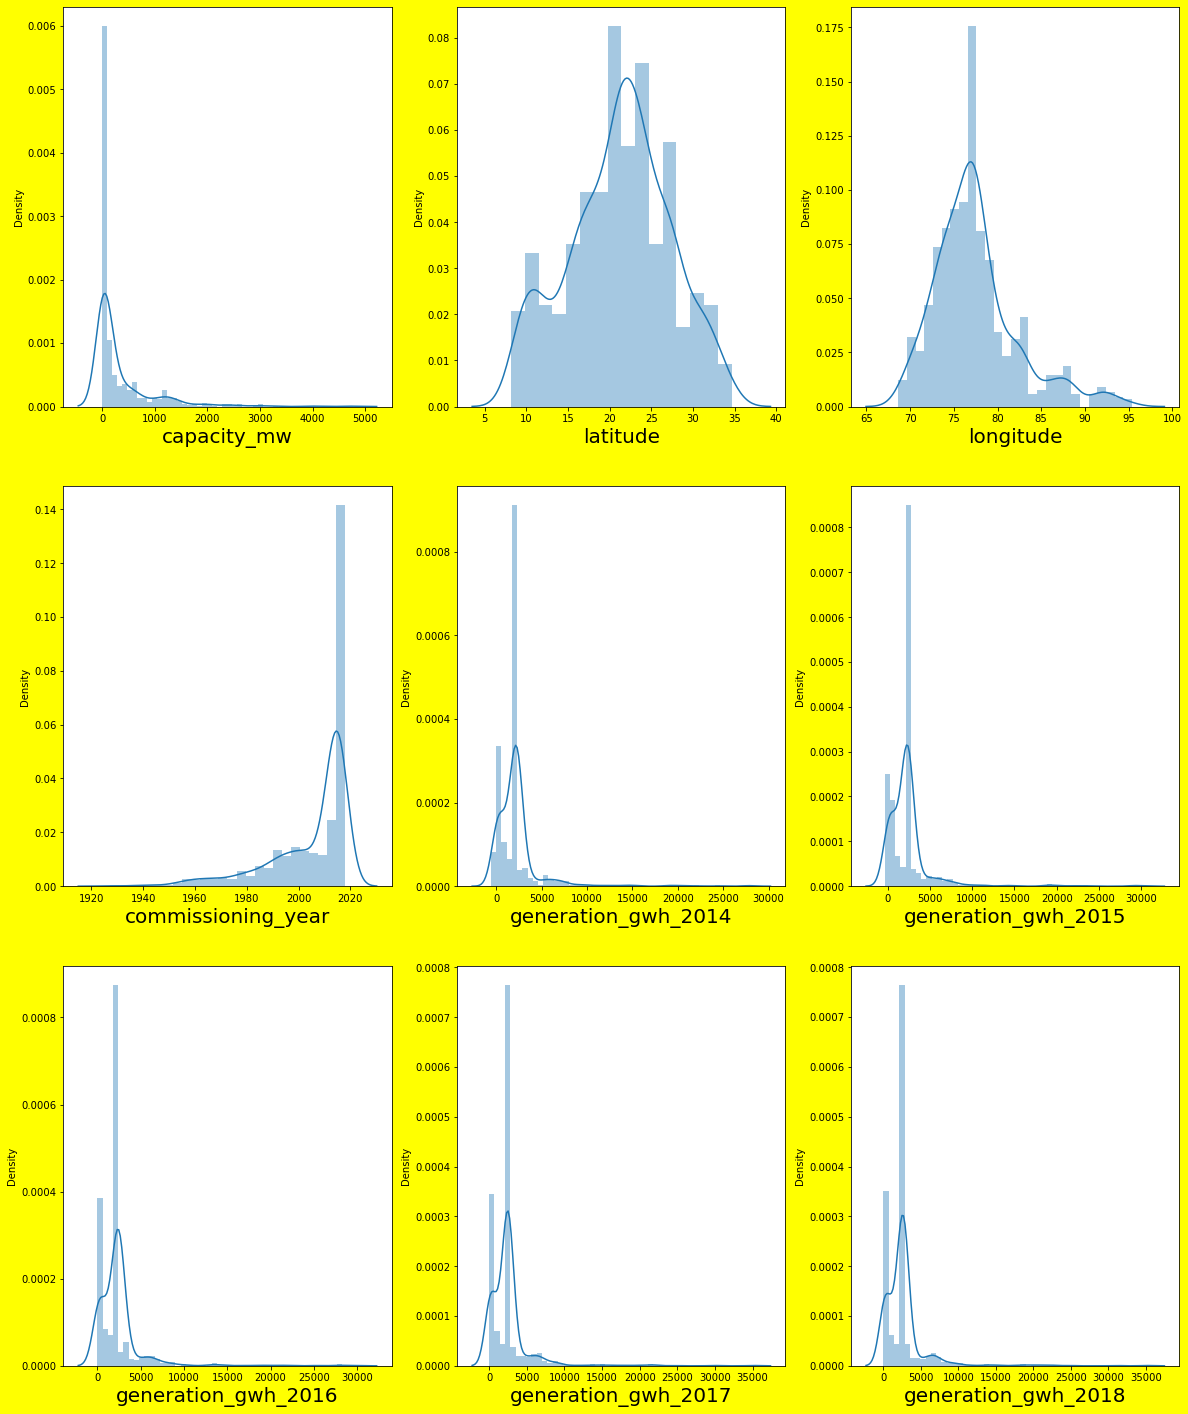

In [935]:
#EDA for continous data
#Let's see how data is distributed for every column
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber=1
for column in df_visualization_Continous_Data:
    if plotnumber <= 10: #column is 10 in number
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df_visualization_Continous_Data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+= 1
plt.show()


In [936]:
df = df.drop(['name'], axis=1)

In [937]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [938]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,2212.958480,2313.83802,2395.467100,2498.380142,2595.465109
1,98.0,24.7663,74.6090,1,2,2015.0,2212.958480,2313.83802,2395.467100,2498.380142,2595.465109
2,39.2,21.9038,69.3732,7,2,2015.0,2212.958480,2313.83802,2395.467100,2498.380142,2595.465109
3,135.0,23.8712,91.3602,2,2,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000


<AxesSubplot:>

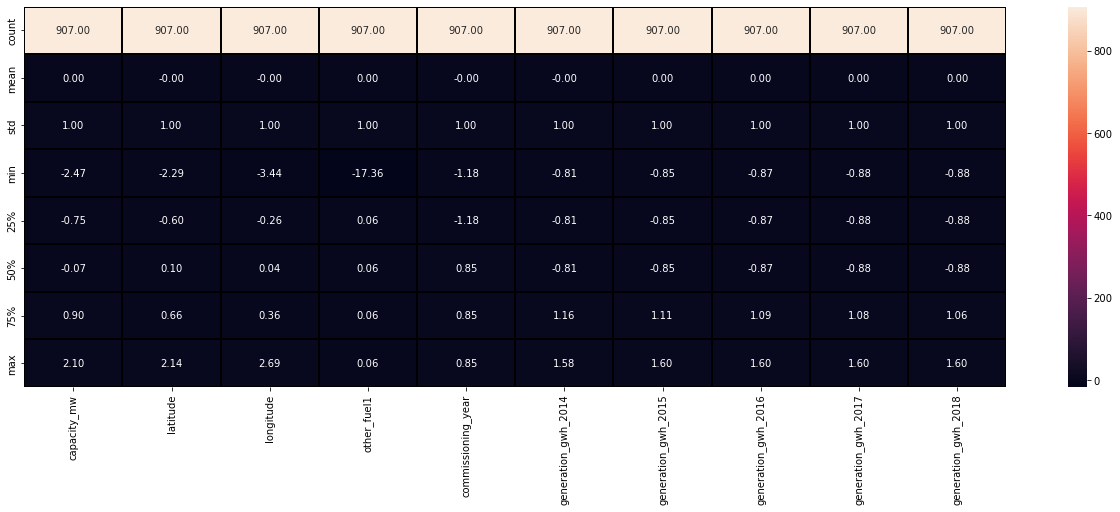

In [939]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(x.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [940]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.003105,-0.004072,0.686131,0.712658,0.744717,0.760770,0.774072
latitude,0.050984,1.000000,0.036362,-0.010204,0.036695,0.034519,0.032189,0.027290,0.023004,0.036997,0.031234
longitude,0.195882,0.036362,1.000000,-0.347948,0.030311,-0.159025,-0.005486,0.009687,0.028238,0.039432,0.037177
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.004912,0.164947,-0.119317,-0.124231,-0.130399,-0.135760,-0.136517
other_fuel1,0.003105,0.036695,0.030311,0.004912,1.000000,0.056437,0.019698,0.024361,0.030068,0.031863,0.035567
commissioning_year,-0.004072,0.034519,-0.159025,0.164947,0.056437,1.000000,0.065207,0.097361,0.125522,0.139108,0.143279
generation_gwh_2014,0.686131,0.032189,-0.005486,-0.119317,0.019698,0.065207,1.000000,0.962416,0.934569,0.899560,0.888982
generation_gwh_2015,0.712658,0.027290,0.009687,-0.124231,0.024361,0.097361,0.962416,1.000000,0.975394,0.939216,0.931119
generation_gwh_2016,0.744717,0.023004,0.028238,-0.130399,0.030068,0.125522,0.934569,0.975394,1.000000,0.972432,0.962409
generation_gwh_2017,0.760770,0.036997,0.039432,-0.135760,0.031863,0.139108,0.899560,0.939216,0.972432,1.000000,0.985953


In [941]:
df.isnull().sum().sum()

0

<AxesSubplot:>

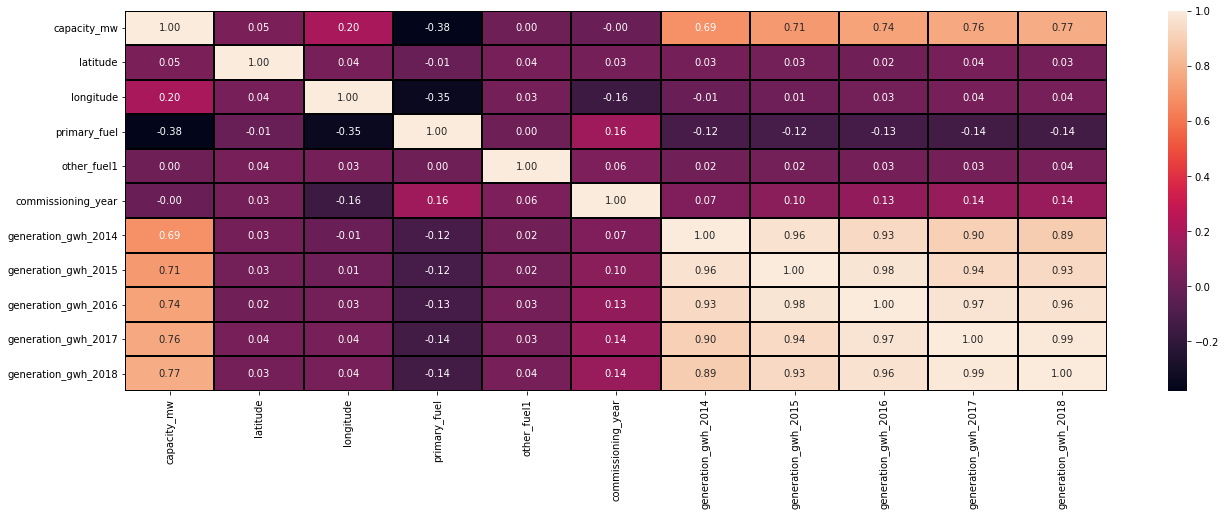

In [942]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [943]:
df.skew().sort_values(ascending=False)

generation_gwh_2015     5.313855
generation_gwh_2017     5.102900
generation_gwh_2016     5.067000
generation_gwh_2014     5.002056
generation_gwh_2018     4.937556
capacity_mw             3.123576
longitude               1.141881
primary_fuel            0.472251
latitude               -0.149698
commissioning_year     -1.714873
other_fuel1           -20.453120
dtype: float64

<AxesSubplot:xlabel='generation_gwh_2014'>

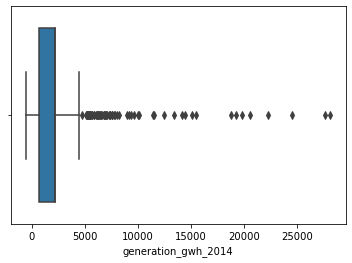

In [944]:
sns.boxplot(df["generation_gwh_2014"])

<AxesSubplot:xlabel='longitude'>

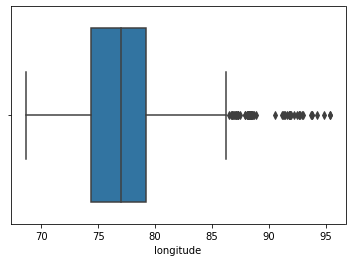

In [945]:
sns.boxplot(df["longitude"])

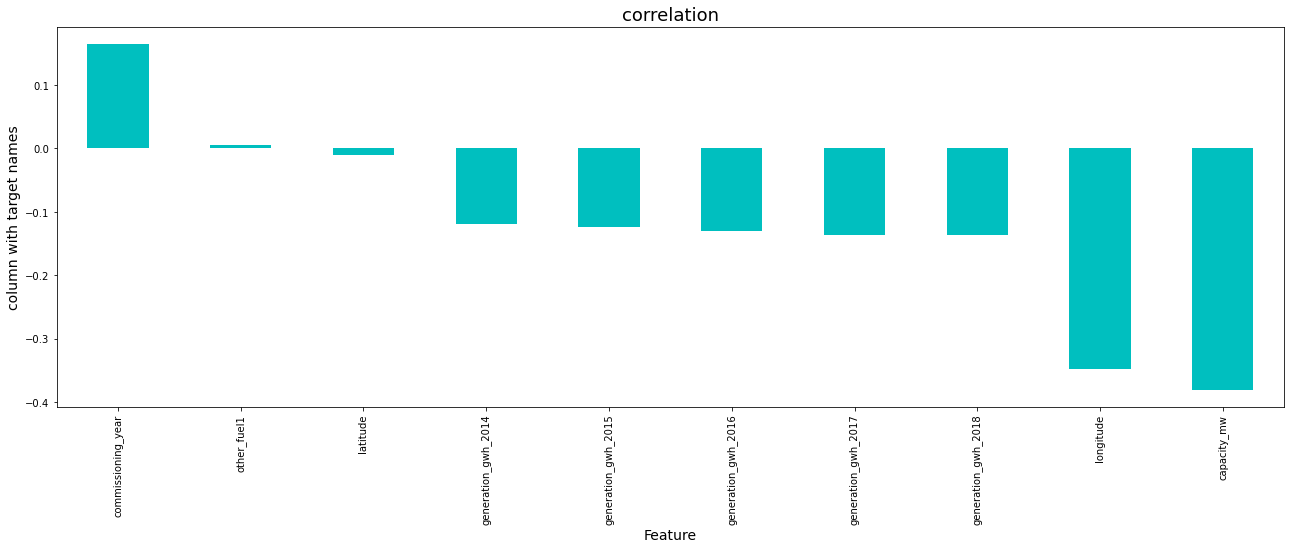

In [946]:
#REALATION WITH PRIMARY FUEL
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(["primary_fuel"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

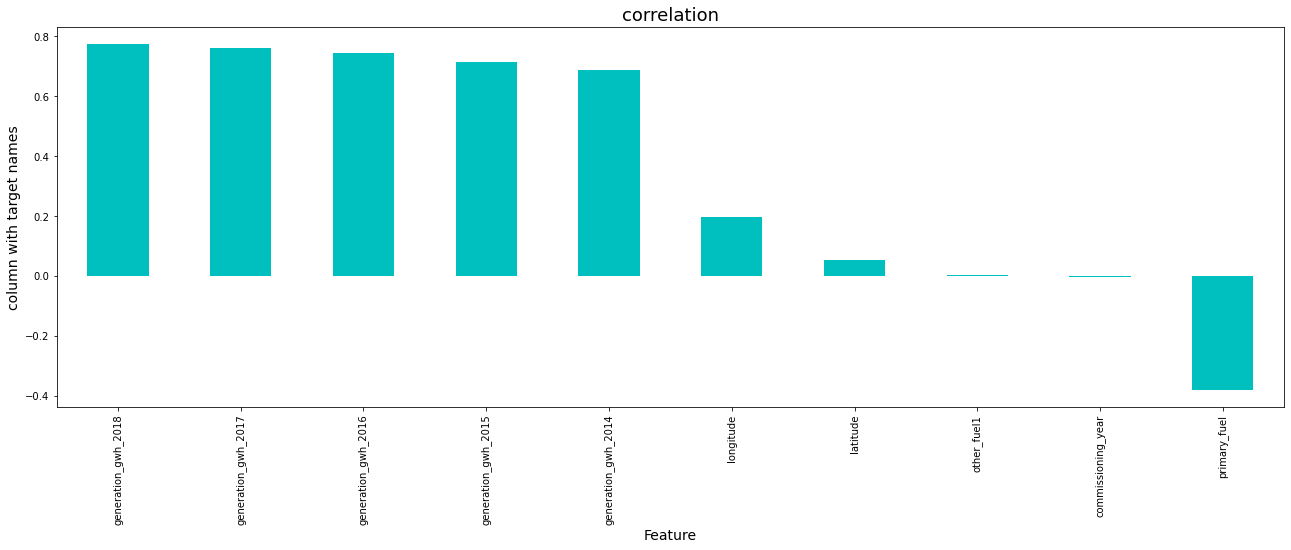

In [947]:
#RELATION WITH CAPACITY
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(["capacity_mw"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [948]:
#RELATION WITH PRIMARY FUEL
corr_matrix=df.corr()
corr_matrix["primary_fuel"].sort_values(ascending=False)

primary_fuel           1.000000
commissioning_year     0.164947
other_fuel1            0.004912
latitude              -0.010204
generation_gwh_2014   -0.119317
generation_gwh_2015   -0.124231
generation_gwh_2016   -0.130399
generation_gwh_2017   -0.135760
generation_gwh_2018   -0.136517
longitude             -0.347948
capacity_mw           -0.380395
Name: primary_fuel, dtype: float64

In [949]:
#RELATION WITH CAPACITYL
corr_matrix=df.corr()
corr_matrix["capacity_mw"].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.774072
generation_gwh_2017    0.760770
generation_gwh_2016    0.744717
generation_gwh_2015    0.712658
generation_gwh_2014    0.686131
longitude              0.195882
latitude               0.050984
other_fuel1            0.003105
commissioning_year    -0.004072
primary_fuel          -0.380395
Name: capacity_mw, dtype: float64

In [950]:
# Partioning the data for primary fuel
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

In [951]:
from sklearn.preprocessing import power_transform
X_new=power_transform(x)

In [952]:
X_new

array([[-1.69576688,  1.1594364 , -0.95254457, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [ 0.19369368,  0.57903232, -0.54497608, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [-0.2923371 ,  0.09991208, -2.3798638 , ...,  0.33127073,
         0.3237122 ,  0.32303295],
       ...,
       [-0.52277344, -0.98053644, -0.28081924, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [ 0.08691496,  0.50893808, -0.79637432, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [-0.75589054, -1.81390048,  0.18088944, ...,  0.33127073,
         0.3237122 ,  0.32303295]])

In [953]:
pd.DataFrame(X_new, columns=x.columns).skew().sort_values(ascending=False)

generation_gwh_2015     1.706413
generation_gwh_2014     1.662012
generation_gwh_2016     0.028283
capacity_mw             0.022164
longitude               0.002926
generation_gwh_2018    -0.000026
generation_gwh_2017    -0.001145
latitude               -0.074269
commissioning_year     -1.077695
other_fuel1           -17.330022
dtype: float64

In [954]:
x=pd.DataFrame(X_new, columns=x.columns)

In [955]:
pd.DataFrame(X_new, columns=x.columns).skew().sort_values(ascending=False)

generation_gwh_2015     1.706413
generation_gwh_2014     1.662012
generation_gwh_2016     0.028283
capacity_mw             0.022164
longitude               0.002926
generation_gwh_2018    -0.000026
generation_gwh_2017    -0.001145
latitude               -0.074269
commissioning_year     -1.077695
other_fuel1           -17.330022
dtype: float64

In [956]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)
Scaled_X

array([[-1.69576688,  1.1594364 , -0.95254455, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [ 0.19369368,  0.57903232, -0.54497607, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [-0.2923371 ,  0.09991208, -2.37986379, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       ...,
       [-0.52277344, -0.98053644, -0.28081923, ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [ 0.08691496,  0.50893808, -0.7963743 , ...,  0.33127073,
         0.3237122 ,  0.32303295],
       [-0.75589054, -1.81390048,  0.18088946, ...,  0.33127073,
         0.3237122 ,  0.32303295]])

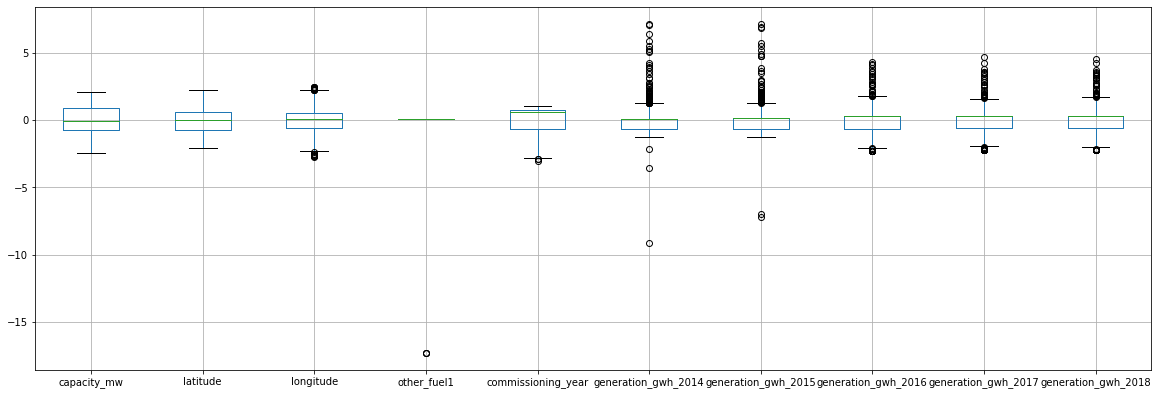

In [957]:
#Plotting boxplots for first 30 columns
x.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [958]:
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
from sklearn.metrics import classification_report

In [959]:
#Splitting the dataframe for logistic regression:
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(Scaled_X,y,random_state=i,test_size=0.25)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 58 The model performs very well
At random_state state:- 58
Training accuracy_score is:- 66.5
Testing accuracy_score is:- 66.5 


At random_state state 60 The model performs very well
At random_state state:- 60
Training accuracy_score is:- 65.6
Testing accuracy_score is:- 65.6 


At random_state state 97 The model performs very well
At random_state state:- 97
Training accuracy_score is:- 65.6
Testing accuracy_score is:- 65.6 


At random_state state 151 The model performs very well
At random_state state:- 151
Training accuracy_score is:- 65.6
Testing accuracy_score is:- 65.6 


At random_state state 186 The model performs very well
At random_state state:- 186
Training accuracy_score is:- 65.6
Testing accuracy_score is:- 65.6 


At random_state state 305 The model performs very well
At random_state state:- 305
Training accuracy_score is:- 65.6
Testing accuracy_score is:- 65.6 




In [961]:
x_train, x_test, y_train, y_test  = train_test_split(Scaled_X,y, test_size=0.25, random_state=58)

In [962]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.31      0.33      0.32        63
           2       0.00      0.00      0.00        13
           3       0.37      0.45      0.41        66
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.15      0.11      0.13        35
           7       0.10      0.17      0.12        24

    accuracy                           0.26       227
   macro avg       0.12      0.13      0.12       227
weighted avg       0.23      0.26      0.24       227



In [963]:
x_train,x_test,y_train,y_test=train_test_split(Scaled_X,y,test_size=0.25, random_state=11)

In [608]:
!pip install classifier


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [964]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [965]:
def print_score(clf, x_train, x_test,y_train, y_test, train=True): #clf is classifier algorithm
    if train: 
        y_pred2=clf.predict(x_train)
        print("\n================Train Result========")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred2)*100:.2f}%")
    elif train==False: #if tain false, it means it is test
              pred=clf.predict(x_test)
              print("\n‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒")
              print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
              print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [966]:
from sklearn.svm import SVC
svc=SVC()
#svc Model training and printing train and test score
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)


================Train Result========
Accuracy Score: 70.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 70.04%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.80      0.75      0.77        64
           2       0.67      0.24      0.35        17
           3       0.82      0.97      0.89        75
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.82      0.48      0.61        29
           7       0.36      0.87      0.51        23

    accuracy                           0.70       227
   macro avg       0.43      0.41      0.39       227
weighted avg       0.69      0.70      0.67       227



In [967]:
from sklearn.ensemble import GradientBoostingClassifier 
gbdt=GradientBoostingClassifier()

#gradient boosting Model training and printing train and test score
gbdt.fit(x_train,y_train)


#Call the function and pass dataset to check train and test score
print_score(gbdt, x_train,x_test,y_train,y_test, train=True) 
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 99.71%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 77.09%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.80      0.77      0.78        64
           2       0.59      0.59      0.59        17
           3       0.89      0.93      0.91        75
           4       1.00      0.33      0.50         3
           5       1.00      0.20      0.33         5
           6       0.79      0.66      0.72        29
           7       0.55      0.74      0.63        23

    accuracy                           0.77       227
   macro avg       0.78      0.62      0.64       227
weighted avg       0.79      0.77      0.77       227



In [968]:
#xgb
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [969]:
xgb.fit(x_train, y_train) 
y_pred3=xgb.predict(x_test)

In [970]:
r2_score(y_test,y_pred3)

0.5192459601900701

In [971]:
from sklearn.ensemble import RandomForestClassifier #same code as above only randon forest used
rf = RandomForestClassifier()

# Random Forest Model training and printing train and test score
rf.fit(x_train,y_train)


# Call the function and pass dataset to check train and test score
print_score(rf, x_train,x_test,y_train,y_test, train=True)
print_score(rf, x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 100.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 79.74%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.83      0.81      0.82        64
           2       0.46      0.35      0.40        17
           3       0.87      0.96      0.91        75
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       0.88      0.76      0.81        29
           7       0.67      0.87      0.75        23

    accuracy                           0.80       227
   macro avg       0.67      0.59      0.59       227
weighted avg       0.79      0.80      0.78       227



In [972]:
rf.fit(x_train, y_train) 
y_pred5=rf.predict(x_test)

In [973]:
r2_score(y_test,y_pred5)


0.49664588464254344

In [974]:
pred=rf.predict(x_test)

In [975]:
#THUS RANDOM CLASIFIR and GRADIENT BOOSTING GIVES THE BEST RESULT

In [976]:
#USING HYPER TUNING TO INCREASE ACCURACY

In [977]:
gbdt.get_params().keys() 

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [978]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'max_depth':range(4,8),
    'min_samples_split': range(2,8,2),
'learning_rate': np.arange(0.1,0.3) #it can go upto 1
}

In [979]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [980]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [981]:
import pandas as pd
gbdt_clf=GradientBoostingClassifier(max_depth=6, min_samples_split=2, learning_rate=0.1)
gbdt_clf.fit(x_train, y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report=pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)} \n")

#***********************Test score******************************************
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



================Train Result======================
Accuracy Score: 100.00%
____________________________________________________
CLASSIFICATION REPORT:
              0      1     2      3    4     5     6      7  accuracy  \
precision   1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
recall      1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
f1-score    1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
support    39.0  194.0  52.0  176.0  6.0  15.0  98.0  100.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support        680.0         680.0  
____________________________________________________
Confusion Matrix: 
 [[ 39   0   0   0   0   0   0   0]
 [  0 194   0   0   0   0   0   0]
 [  0   0  52   0   0   0   0   0]
 [  0   0   0 176   0   0   0   0]
 [  0   0   0   0   6   0   0   0]
 [  0   0   0   0   0  15   0   0]
 [  0   0   0 

In [982]:
#HYPERTUNING FOR RANDOM FOREST

In [983]:
rf.get_params().keys() 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [984]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'max_depth':range(4,8),
    'min_samples_split': range(2,8,2),
'n_estimators': range(3, 6) #it can go upto 1
}

In [985]:
RFgrid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs = -1)

In [988]:
import pandas as pd
rf_clf=RandomForestClassifier(max_depth=6, min_samples_split=4, n_estimators=58)
rf_clf.fit(x_train, y_train)
rfpred=rf_clf.predict(x_train)
rf_clf_report=pd.DataFrame(classification_report(y_train, rfpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, rfpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, rfpred)} \n")

#***********************Test score******************************************
rfpred=rf_clf.predict(x_test)
rf_report = pd.DataFrame(classification_report(y_test, rfpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, rfpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, rfpred)}\n")


================Train Result======================
Accuracy Score: 81.76%
____________________________________________________
CLASSIFICATION REPORT:
              0      1     2      3    4     5     6      7  accuracy  \
precision   1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
recall      1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
f1-score    1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
support    39.0  194.0  52.0  176.0  6.0  15.0  98.0  100.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support        680.0         680.0  
____________________________________________________
Confusion Matrix: 
 [[  2   1   0   0   0   0   2  34]
 [  0 167   0   9   0   0   4  14]
 [  0   8  25  13   0   0   0   6]
 [  0   0   0 176   0   0   0   0]
 [  0   4   0   0   2   0   0   0]
 [  0   1   0   1   0   7   0   6]
 [  0   3   0  

In [621]:
#LET US PREDICT the capacity

In [989]:
# dividing feature and Label data
X = df.drop(columns=['capacity_mw'], axis = 1)
y= df['capacity_mw']

In [990]:
#using linear regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [991]:
from sklearn.model_selection import train_test_split
LR=LinearRegression()

In [993]:
from sklearn.metrics import r2_score
for i in range(0,200):
    x_train, x_test, y_train, y_test=train_test_split(Scaled_X,y,test_size=0.25,random_state=1)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.7917338296815138
At random state 0,the testing accuracy is:- 0.7430722262838925


At random state 1,the training accuracy is:- 0.7917338296815138
At random state 1,the testing accuracy is:- 0.7430722262838925


At random state 2,the training accuracy is:- 0.7917338296815138
At random state 2,the testing accuracy is:- 0.7430722262838925


At random state 3,the training accuracy is:- 0.7917338296815138
At random state 3,the testing accuracy is:- 0.7430722262838925


At random state 4,the training accuracy is:- 0.7917338296815138
At random state 4,the testing accuracy is:- 0.7430722262838925


At random state 5,the training accuracy is:- 0.7917338296815138
At random state 5,the testing accuracy is:- 0.7430722262838925


At random state 6,the training accuracy is:- 0.7917338296815138
At random state 6,the testing accuracy is:- 0.7430722262838925


At random state 7,the training accuracy is:- 0.7917338296815138
At random state 7,the testing acc

At random state 66,the training accuracy is:- 0.7917338296815138
At random state 66,the testing accuracy is:- 0.7430722262838925


At random state 67,the training accuracy is:- 0.7917338296815138
At random state 67,the testing accuracy is:- 0.7430722262838925


At random state 68,the training accuracy is:- 0.7917338296815138
At random state 68,the testing accuracy is:- 0.7430722262838925


At random state 69,the training accuracy is:- 0.7917338296815138
At random state 69,the testing accuracy is:- 0.7430722262838925


At random state 70,the training accuracy is:- 0.7917338296815138
At random state 70,the testing accuracy is:- 0.7430722262838925


At random state 71,the training accuracy is:- 0.7917338296815138
At random state 71,the testing accuracy is:- 0.7430722262838925


At random state 72,the training accuracy is:- 0.7917338296815138
At random state 72,the testing accuracy is:- 0.7430722262838925


At random state 73,the training accuracy is:- 0.7917338296815138
At random state 73

At random state 145,the training accuracy is:- 0.7917338296815138
At random state 145,the testing accuracy is:- 0.7430722262838925


At random state 146,the training accuracy is:- 0.7917338296815138
At random state 146,the testing accuracy is:- 0.7430722262838925


At random state 147,the training accuracy is:- 0.7917338296815138
At random state 147,the testing accuracy is:- 0.7430722262838925


At random state 148,the training accuracy is:- 0.7917338296815138
At random state 148,the testing accuracy is:- 0.7430722262838925


At random state 149,the training accuracy is:- 0.7917338296815138
At random state 149,the testing accuracy is:- 0.7430722262838925


At random state 150,the training accuracy is:- 0.7917338296815138
At random state 150,the testing accuracy is:- 0.7430722262838925


At random state 151,the training accuracy is:- 0.7917338296815138
At random state 151,the testing accuracy is:- 0.7430722262838925


At random state 152,the training accuracy is:- 0.7917338296815138
At 

In [994]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

In [995]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 198.314154135252
MSE: 104023.47125540733
RMSE: 322.52669851565366


In [996]:
LR.score(x_train , y_train)

0.7917338296815138

In [997]:
#With descision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predD=dt.predict(x_test)

In [998]:
print('MAE:', metrics.mean_absolute_error(y_test, predD))
print('MSE:', metrics.mean_squared_error(y_test, predD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predD)))

MAE: 11.295374449339208
MSE: 12377.304601321586
RMSE: 111.25333523684397


In [999]:
dt.score(x_train , y_train)

1.0

In [1000]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predR=rfr.predict(x_test)

In [1001]:
print('MAE:', metrics.mean_absolute_error(y_test, predR))
print('MSE:', metrics.mean_squared_error(y_test, predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predR)))

MAE: 9.409862907488986
MSE: 4532.539424677457
RMSE: 67.32413701398227


In [1002]:
rfr.score(x_train , y_train)

0.9977708878327052

In [1003]:
#xgb
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)
predX=xgb.predict(x_test)

In [1004]:
print('MAE:', metrics.mean_absolute_error(y_test, predX))
print('MSE:', metrics.mean_squared_error(y_test, predX))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predX)))

MAE: 6.273126897139696
MSE: 615.1897553030487
RMSE: 24.803019076375534


In [1005]:
xgb.score(x_train , y_train)

0.999999863676599

In [1006]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
predA=ada.predict(x_test)

In [1007]:
print('MAE:', metrics.mean_absolute_error(y_test, predA))
print('MSE:', metrics.mean_squared_error(y_test, predA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predA)))

MAE: 41.029046277896306
MSE: 4304.474468761935
RMSE: 65.60849387664629


In [1008]:
ada.score(x_train , y_train)

0.9944770067451795

In [1009]:
from sklearn.model_selection import RandomizedSearchCV

In [1010]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [1011]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions=params)

In [1012]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [1013]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=60)

In [1014]:
ada=AdaBoostRegressor(learning_rate=0.3,n_estimators=60)
ada.fit(x_train,y_train) #this is our score
predA= ada.predict(x_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,predA))

*****accuracy post tuning*****
0.9914803937769794


,Y Test,Pred
667,5.0,53.045787
255,24.0,53.045787
867,1500.0,1479.652830
142,630.0,602.523810
640,12.5,53.045787


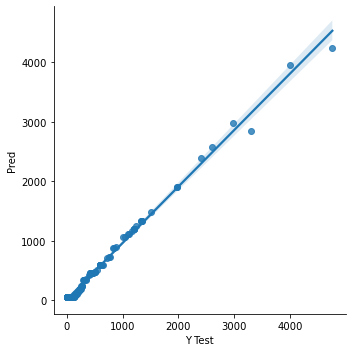

In [1015]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':predA},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [1029]:
ada_tuning=ada.fit(x_train,y_train)

In [1030]:
import pickle as pkl
Power_plant_model = 'Power_plant_model.pickle'
pkl.dump(ada_tuning, open(Power_plant_model,'wb'))